# Heart Disease Prediction

In [114]:
### Importing Essential libraries

In [194]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go


import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error


### Going through dataset

In [195]:
dataset = pd.read_csv("E:\heart.csv")

In [196]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [197]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [198]:
dataset['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [199]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [200]:
# NO missing values found

In [201]:
dataset.shape


(303, 14)

In [202]:
dataset.size

4242

In [203]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [204]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [205]:
dataset['target'].unique()

array([1, 0], dtype=int64)

In [206]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

## Visualization

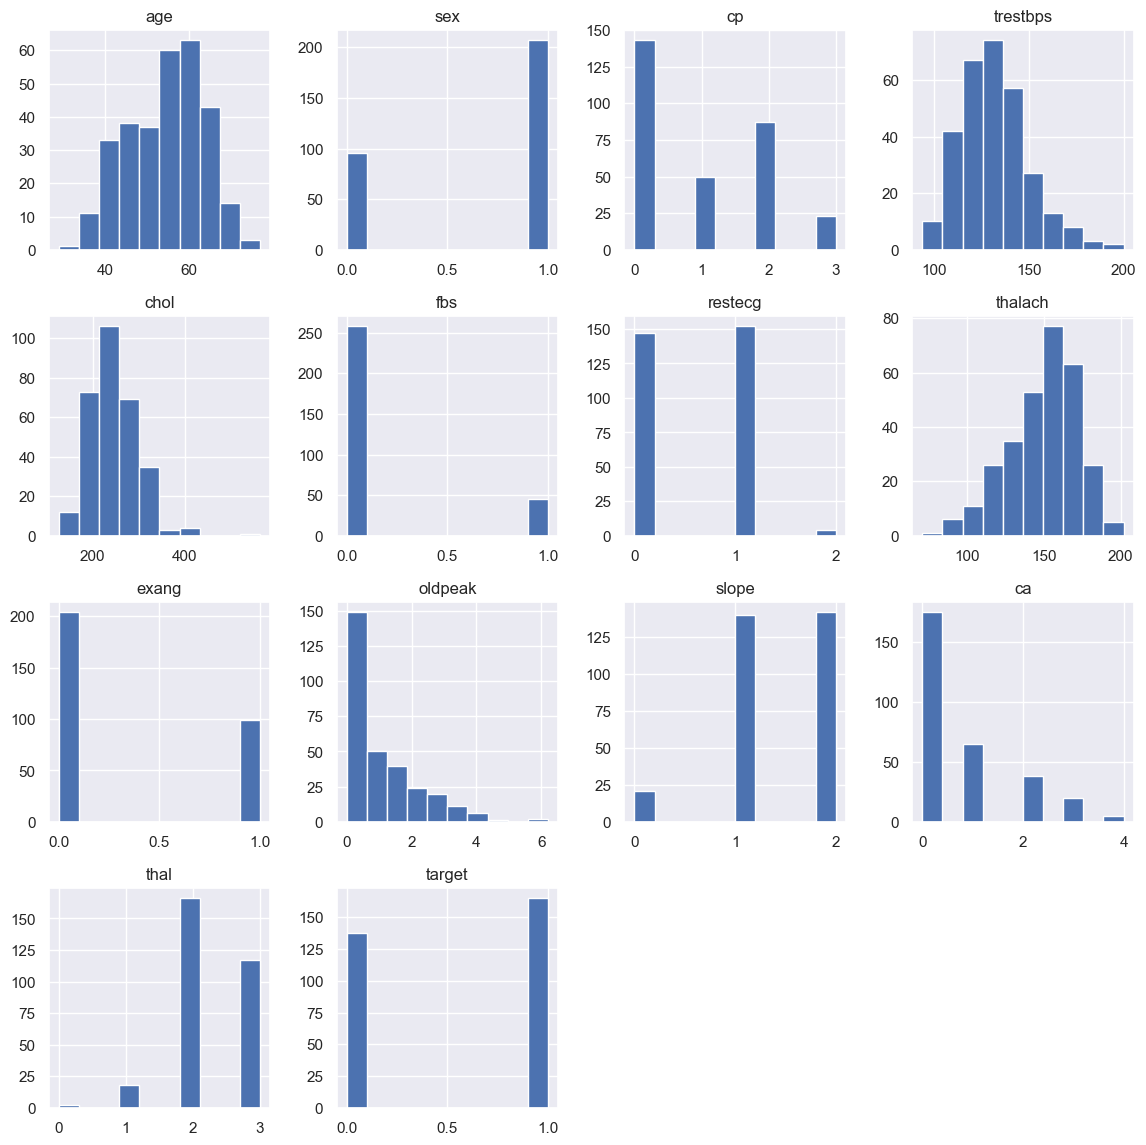

In [207]:
dataset.hist(figsize=(14,14))
plt.show()

In [238]:
plt.bar(x=dataset['sex'],y=dataset['age'])
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

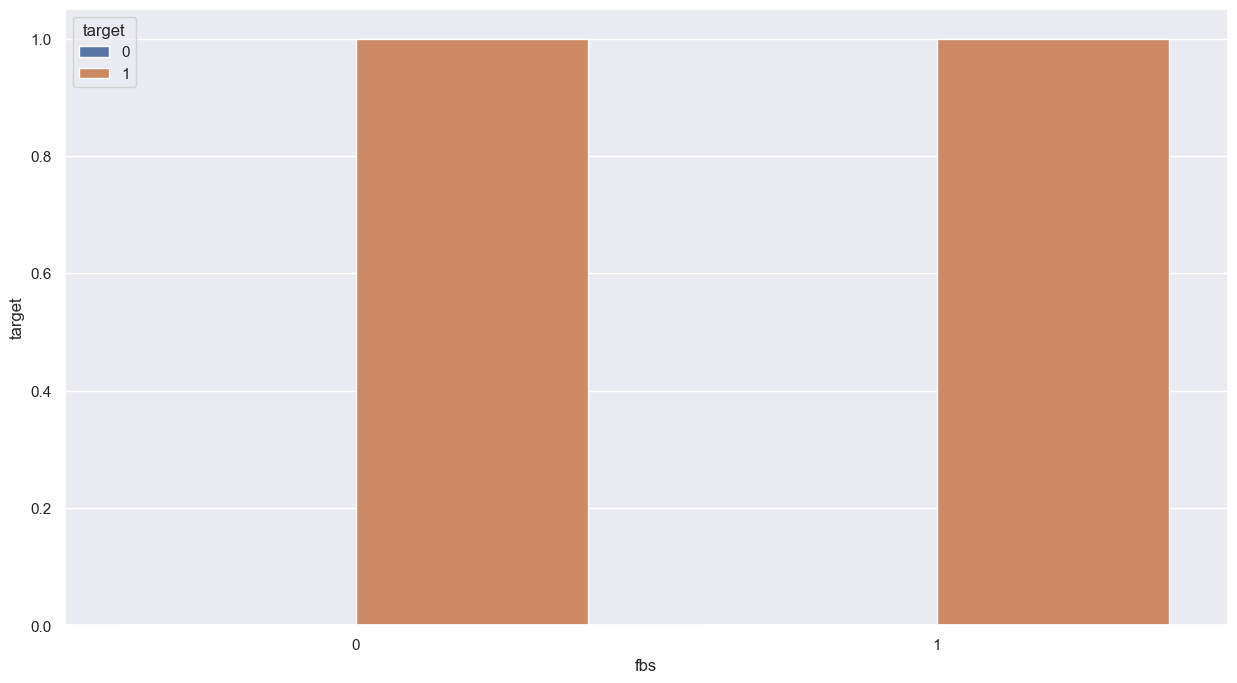

In [236]:
sns.barplot(x="fbs", y="target", data=dataset,hue=dataset['target'])
plt.show()

<Axes: xlabel='sex', ylabel='age'>

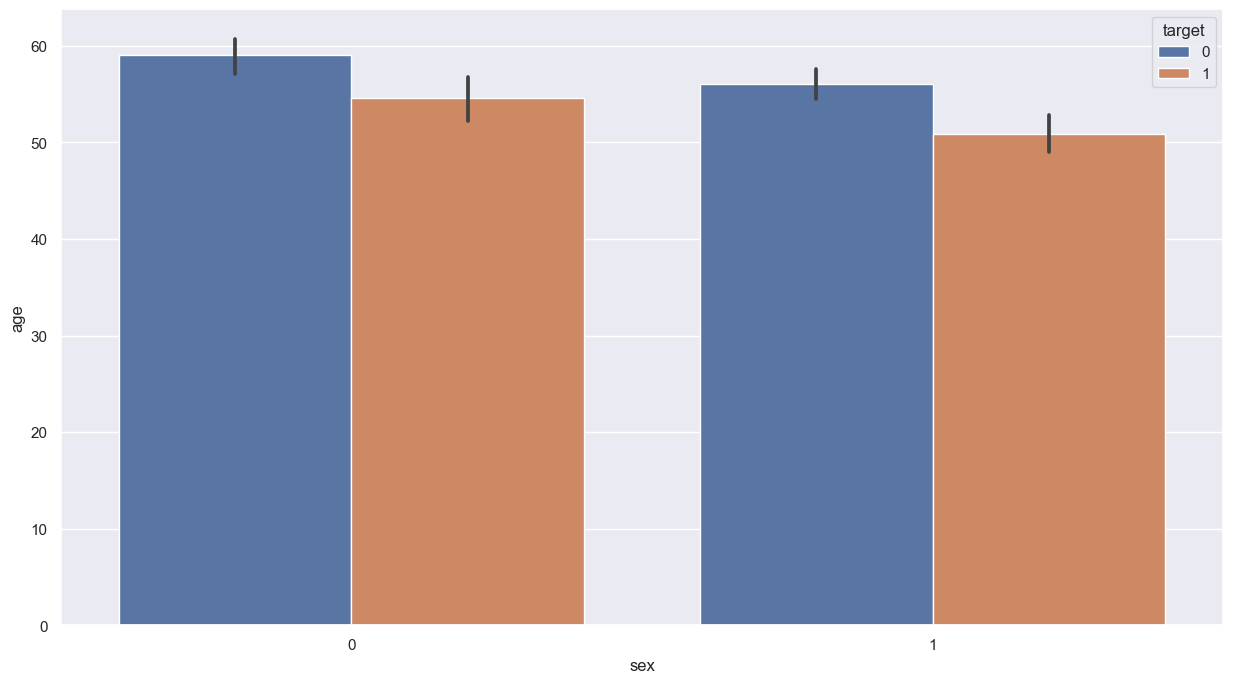

In [228]:
sns.barplot(x=dataset['sex'],y=dataset['age'],hue=dataset['target'])

<Axes: xlabel='cp', ylabel='target'>

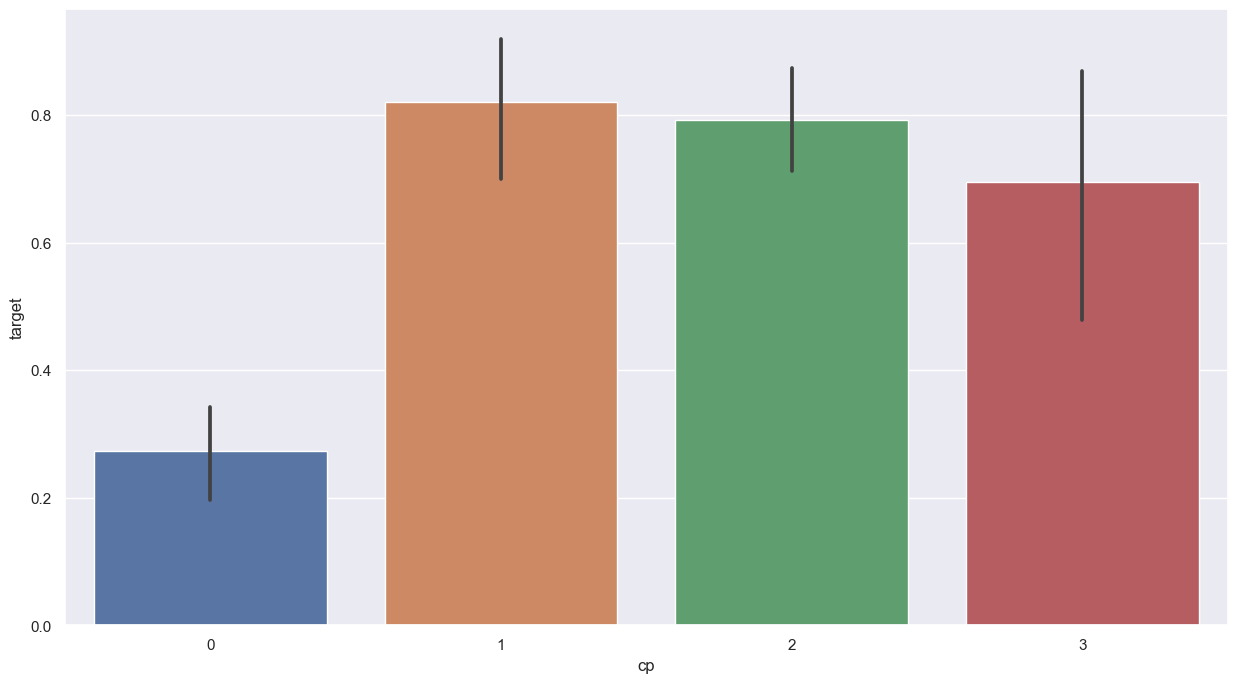

In [229]:
sns.barplot(x=dataset["cp"],y=dataset['target'])

<Axes: xlabel='sex', ylabel='target'>

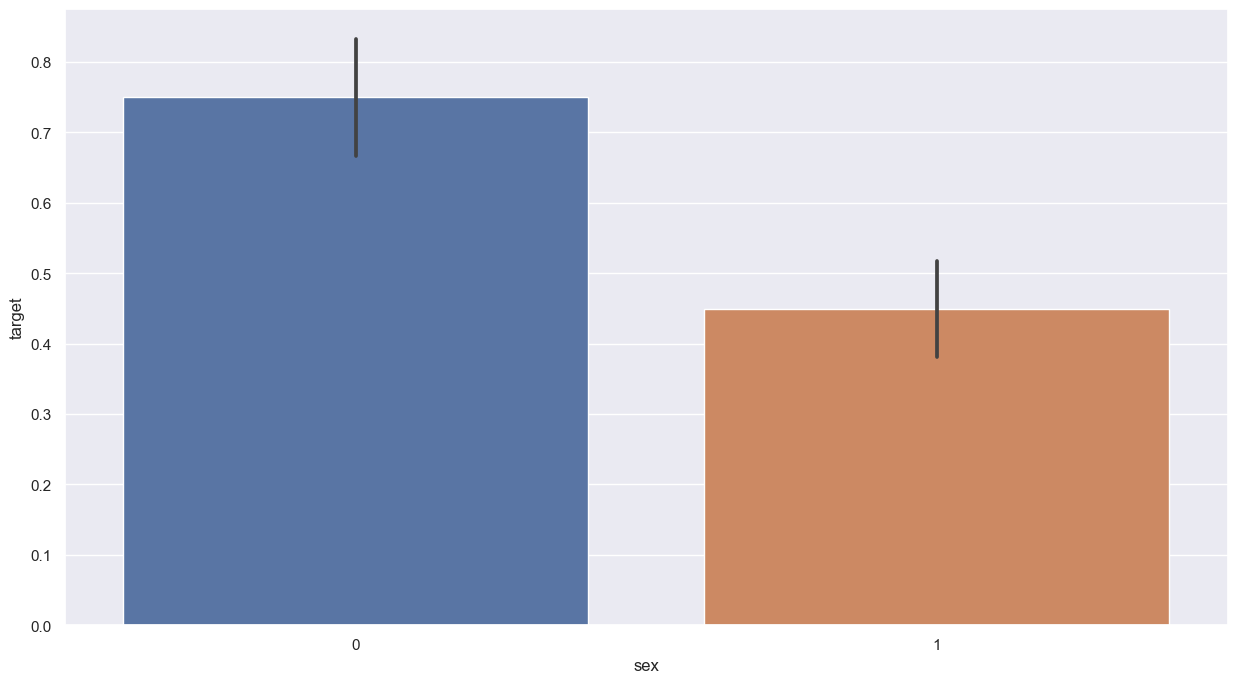

In [230]:
sns.barplot(x=dataset["sex"],y=dataset['target'])

C:\Users\vinay\AppData\Local\Temp\ipykernel_17580\4101355304.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='thal', ylabel='Density'>

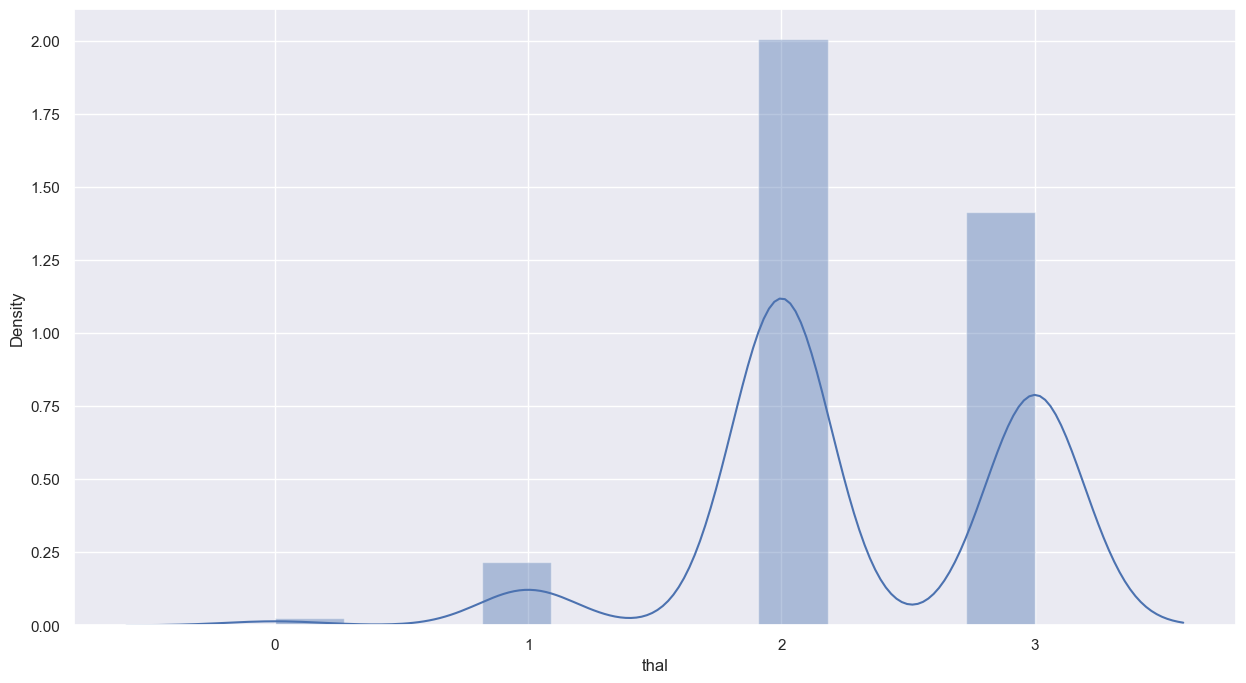

In [231]:
sns.distplot(dataset["thal"])

In [232]:
dataset["target"].unique()

array([1, 0], dtype=int64)

In [233]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1    165
0    138
Name: target, dtype: int64


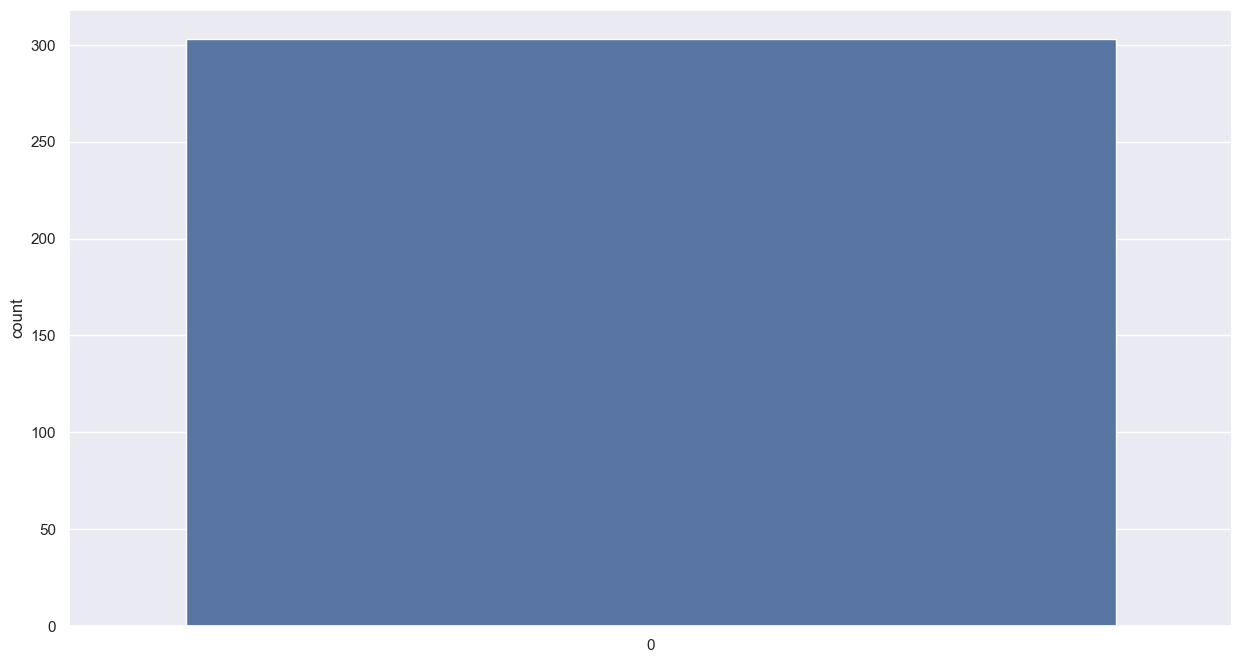

In [234]:
y = dataset["target"]
sns.countplot(y)
target_temp = dataset.target.value_counts()
print(target_temp)

## Data preprocessing

In [239]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [240]:
dataset['target'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: target, Length: 303, dtype: bool

In [241]:
dataset['target'].sum()

165

In [242]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [243]:
#Storing in X and y

In [244]:
X,y=dataset,dataset.target

In [245]:
X.drop('target',axis=1,inplace=True)

In [246]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [247]:
####Or X, y = heart.iloc[:, :-1], heart.iloc[:, -1]

In [248]:
X.shape

(303, 13)

In [249]:
y.shape

(303,)

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [251]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [252]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [253]:
X_test

array([[ 0.18017482, -1.46841752, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.40075247,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 1.06248543,  0.68100522,  1.00257707, ..., -0.64911323,
        -0.71442887,  1.12302895],
       ...,
       [ 0.29046364,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [-0.26098049,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.62133012,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895]])

In [254]:
y_test


246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [255]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


In [256]:
#Model

## Decision Tree Classifier

In [257]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

In [258]:
print(Y_pred_dt.shape)

(91,)


In [259]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [260]:
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 79.12 %


# KNN

In [261]:
from sklearn.neighbors import KNeighborsClassifier


In [262]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)

In [263]:
Y_pred_knn.shape

(91,)

In [264]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 80.22 %


## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

In [ ]:
score_rf = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_dt)+" %")

## Logistic Regression

In [182]:
from sklearn.metrics import accuracy_score

In [183]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

Y_pred_lr = lr.predict(X_test)

In [184]:
Y_pred_lr.shape

(91,)

In [185]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 76.92 %


## Naive Bayes

In [186]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

Y_pred_nb = nb.predict(X_test)

In [187]:
Y_pred_nb.shape

(91,)

In [188]:
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 79.12 %


## SVM

In [189]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

Y_pred_svm = sv.predict(X_test)

In [190]:
Y_pred_svm.shape

(91,)

In [191]:
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 76.92 %


### Final Comparison of all models

In [192]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 76.92 %
The accuracy score achieved using Naive Bayes is: 79.12 %
The accuracy score achieved using Support Vector Machine is: 76.92 %
The accuracy score achieved using K-Nearest Neighbors is: 80.22 %
The accuracy score achieved using Decision Tree is: 79.12 %
The accuracy score achieved using Random Forest is: 79.12 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

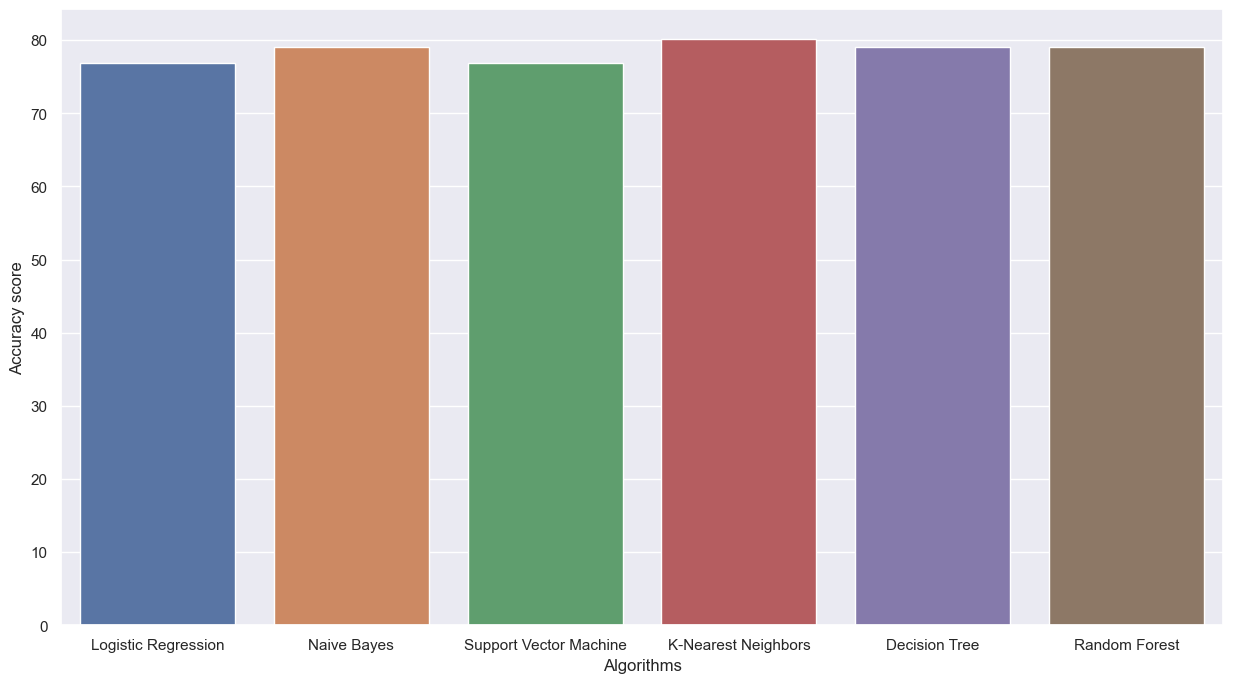

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

#### From above models KNN and Random forest has good results as compared to other algorithms

# Thank You!